<a href="https://colab.research.google.com/github/maurojp/topic_modeling/blob/main/toping_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Descargamos las librerías necesarias**

In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS

**Descargamos y visualizamos el Dataset**

In [ ]:
!wget --quiet --no-clobber https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

In [ ]:
data = pd.read_csv("bbc-text.csv")

In [ ]:
data.head()

category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...

**Visualizamos las etiquetas de las categorías**

In [ ]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

**Concatenamos los textos para generar la nube de palabras**

In [ ]:
text = data['text']

In [ ]:
long_string = ','.join(list(text.values))

In [ ]:
long_string

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

**Generamos la nube de palabras**

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color="white", max_words=1000, contour_width=3, contour_color='steelblue', stopwords = STOPWORDS)

In [ ]:
wordcloud.generate(long_string)

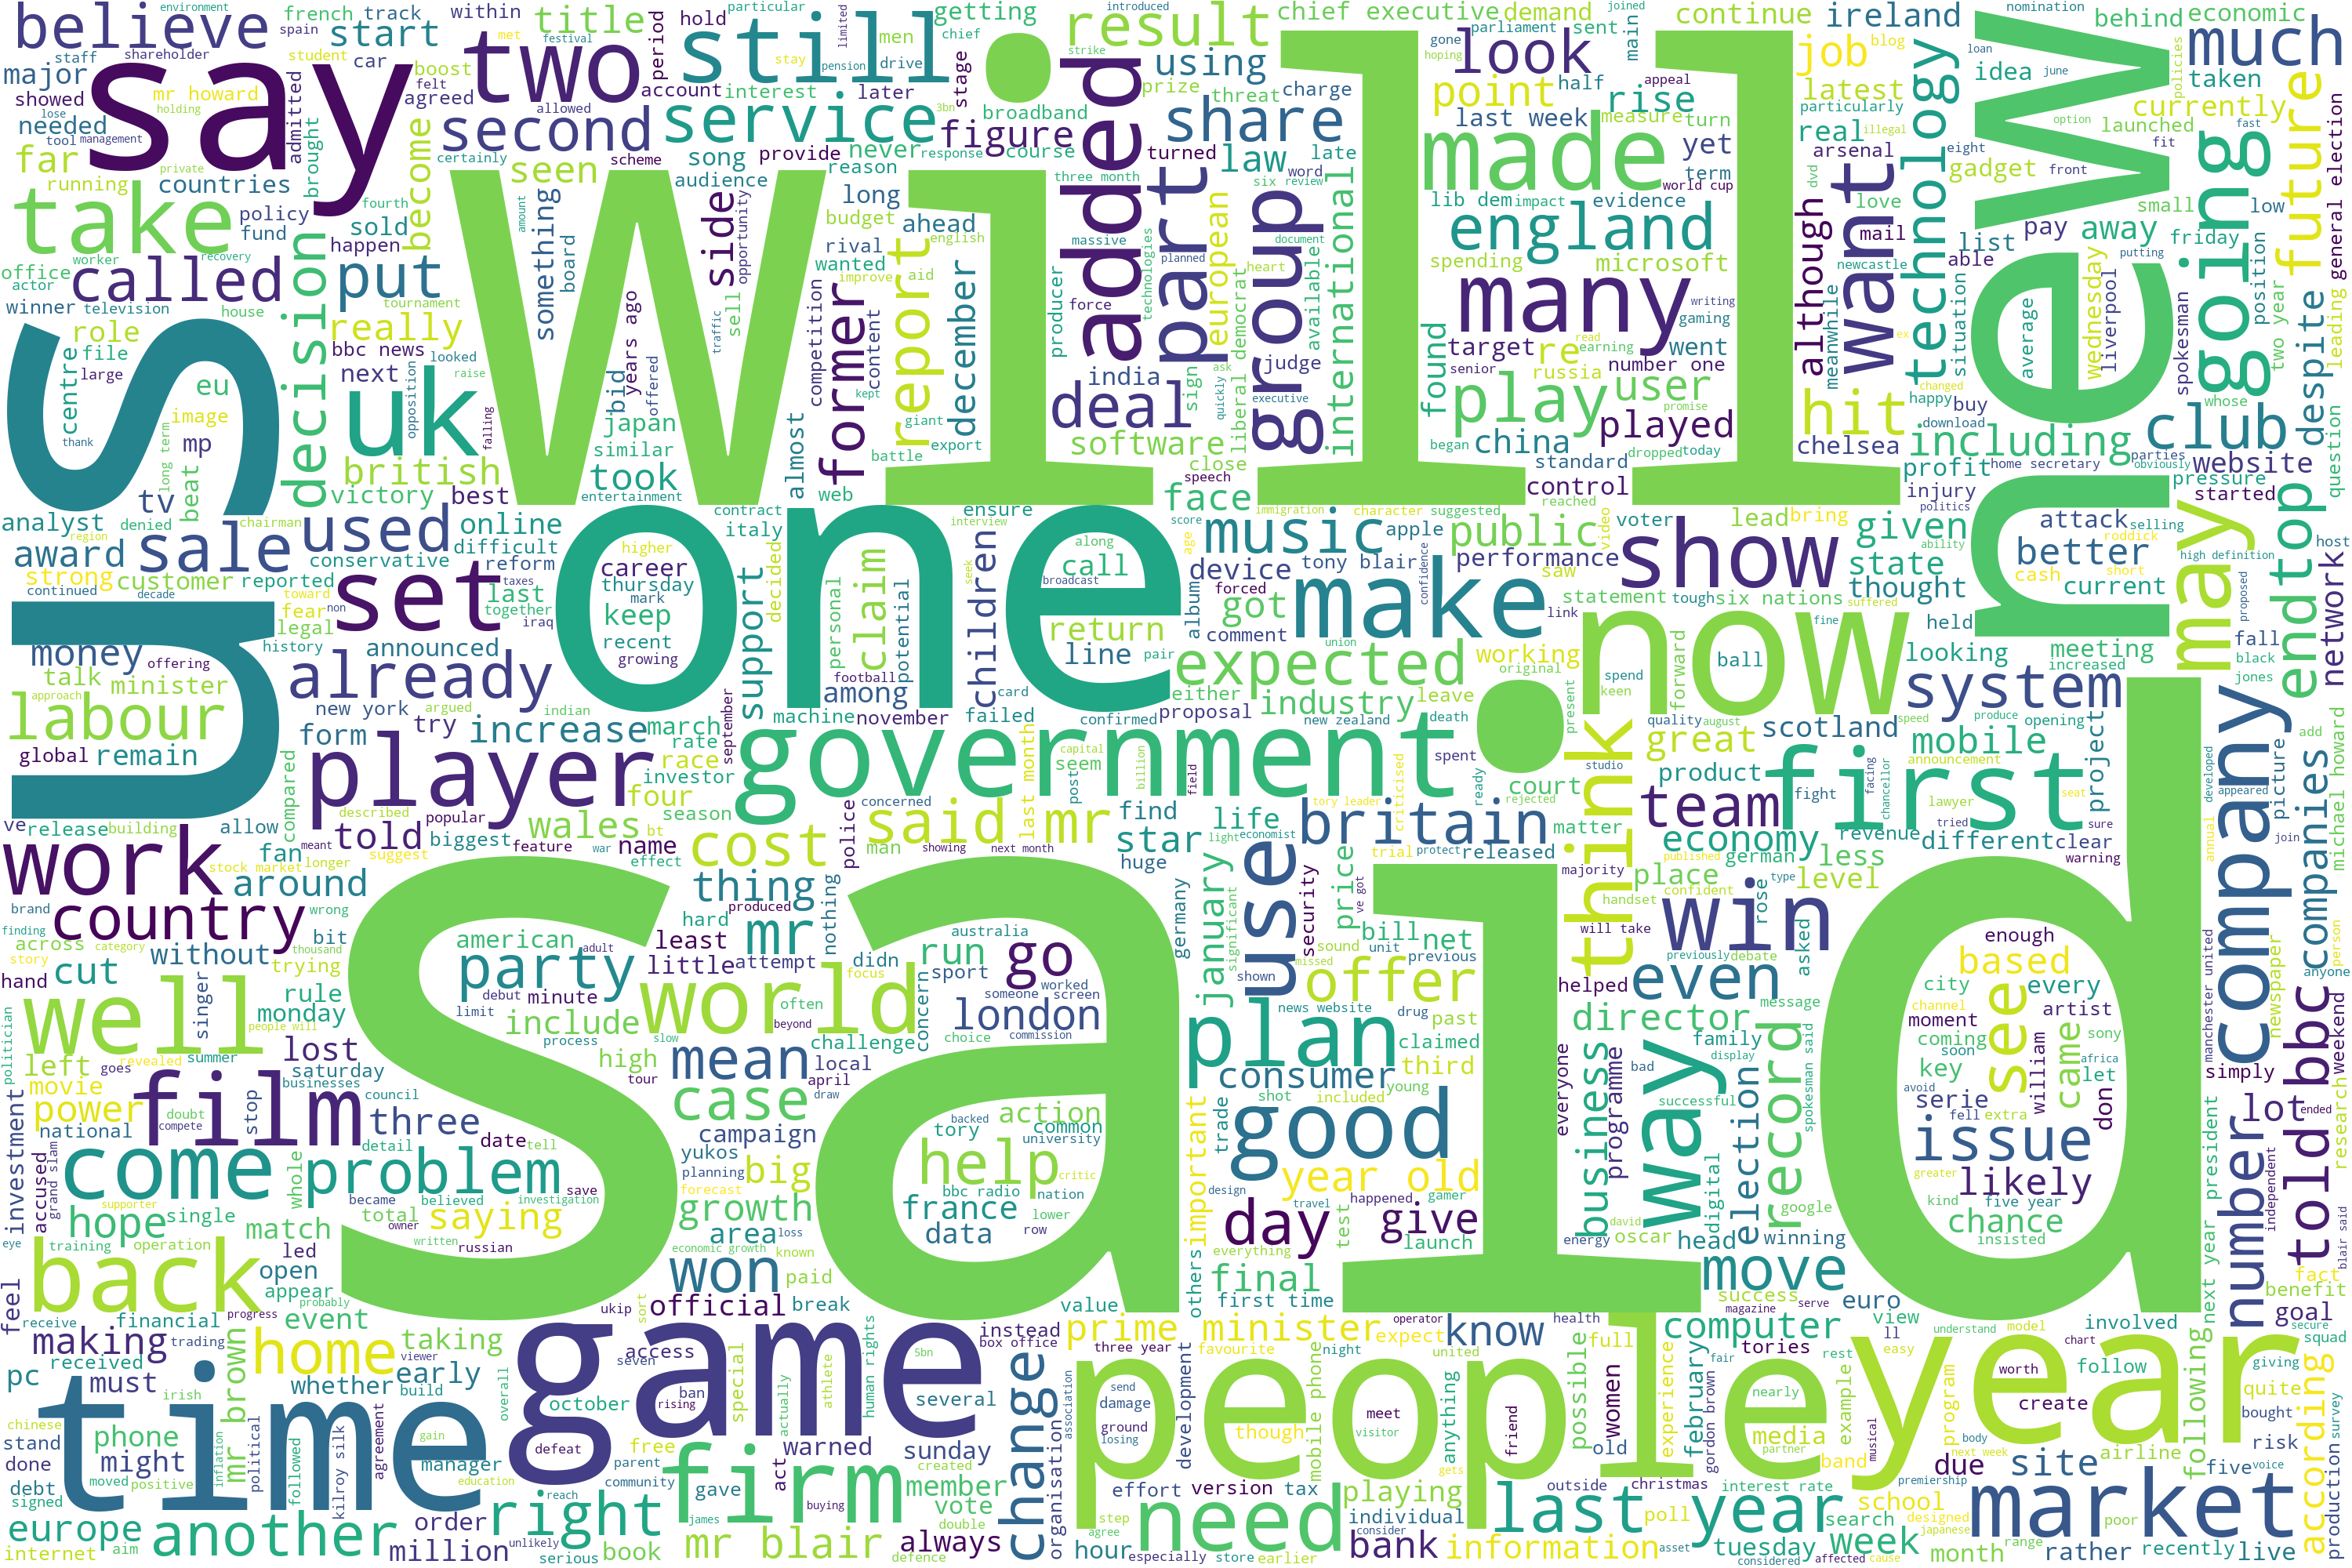

In [ ]:
wordcloud.to_image()

**Definimos una función para preprocesar el texto al generar la bolsa de palabras**

In [ ]:
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)
    return text

**Generamos el modelo de bolsa de palabras**

In [ ]:
# Inicializamos Countvectorizer
bow_vectorizer = CountVectorizer(preprocessor = preprocess_text, max_df = 0.9, min_df = 25, max_features = 5000, stop_words = 'english')
# Generamos el modelo Countvectorizer con los textos
bow = bow_vectorizer.fit_transform(text)

**Definimos el modelo LDA, lo entrenamos y visualizamos los cinco tópicos**

In [ ]:
lda = LatentDirichletAllocation(n_components = 5, random_state = 42)

In [ ]:
lda.fit(bow)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
for index, topic in enumerate(lda.components_):
    print(f'Top 15 palabras para el Tópico Nro.{index}')
    print([bow_vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 15 palabras para el Tópico Nro.0
['world', 'oil', 'china', 'economic', 'sales', 'bank', 'firm', 'new', 'economy', 'growth', 'market', 'company', 'year', 'bn', 'said']


Top 15 palabras para el Tópico Nro.1
['plans', 'say', 'public', 'brown', 'new', 'told', 'minister', 'blair', 'party', 'election', 'people', 'labour', 'government', 'mr', 'said']


Top 15 palabras para el Tópico Nro.2
['like', 'phone', 'software', 'games', 'net', 'digital', 'users', 'use', 'mr', 'music', 'new', 'technology', 'mobile', 'people', 'said']


Top 15 palabras para el Tópico Nro.3
['films', 'band', 'number', 'years', 'director', 'star', 'won', 'award', 'awards', 'new', 'music', 'year', 'said', 'best', 'film']


Top 15 palabras para el Tópico Nro.4
['cup', 'ireland', 'half', 'just', 'wales', 'team', 'players', 'play', 'win', 'world', 'time', 'year', 'england', 'game', 'said']


